<a href="https://www.kaggle.com/code/vanpatangan/predict-commercial-flight-delays?scriptVersionId=238633027" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import warnings 
warnings.simplefilter('ignore')

In [2]:
# Import commercial flight data 
flights = pd.read_csv('/kaggle/input/bts-january-2024-commercial-flights-data/T_ONTIME_MARKETING.csv')

# Import IATA codes to identify airline names 
iata_codes = pd.read_excel('/kaggle/input/bts-january-2024-commercial-flights-data/Bansard-airlines-codes-IATA-ICAO.xlsx', 'All Airlines')

# EDA

In [3]:
flights.describe()

,OP_CARRIER_FL_NUM,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,DIV3_WHEELS_OFF,DIV4_AIRPORT,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_WHEELS_ON,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
count,582425.000000,582425.000000,582425.000000,582425.000000,561029.000000,560955.000000,560515.000000,560515.000000,560093.000000,560093.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2501.948685,31759.344903,31759.370367,1318.418941,1328.683027,15.971901,18.977963,1354.128211,1473.984122,8.276883,...,1702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1684.777546,1326.656038,1326.672392,482.205147,496.228741,66.059029,11.511321,497.003892,520.207989,6.952590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,30070.000000,30070.000000,6.000000,1.000000,-56.000000,1.000000,1.000000,1.000000,1.000000,...,1702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1146.000000,30693.000000,30693.000000,910.000000,918.000000,-6.000000,12.000000,935.000000,1100.000000,4.000000,...,1702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2166.000000,31453.000000,31453.000000,1315.000000,1325.000000,-2.000000,16.000000,1340.000000,1509.000000,6.000000,...,1702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3704.000000,32519.000000,32519.000000,1725.000000,1736.000000,12.000000,22.000000,1751.000000,1911.000000,10.000000,...,1702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9685.000000,36101.000000,36101.000000,2359.000000,2400.000000,3125.000000,213.000000,2400.000000,2400.000000,444.000000,...,1702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582425 entries, 0 to 582424
Data columns (total 59 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  582425 non-null  object 
 1   MKT_UNIQUE_CARRIER       582425 non-null  object 
 2   OP_UNIQUE_CARRIER        582425 non-null  object 
 3   TAIL_NUM                 576149 non-null  object 
 4   OP_CARRIER_FL_NUM        582425 non-null  int64  
 5   ORIGIN_CITY_MARKET_ID    582425 non-null  int64  
 6   ORIGIN_CITY_NAME         582425 non-null  object 
 7   ORIGIN_STATE_ABR         582425 non-null  object 
 8   DEST_CITY_MARKET_ID      582425 non-null  int64  
 9   DEST_CITY_NAME           582425 non-null  object 
 10  DEST_STATE_ABR           582425 non-null  object 
 11  CRS_DEP_TIME             582425 non-null  int64  
 12  DEP_TIME                 561029 non-null  float64
 13  DEP_DELAY                560955 non-null  float64
 14  TAXI

In [5]:
iata_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   IATA     1059 non-null   object
 1   ICAO     1060 non-null   object
 2   Airline  1060 non-null   object
dtypes: object(3)
memory usage: 25.0+ KB


In [6]:
# Percentage of missing values in flights
missing = flights.isnull().mean() * 100
print(missing[missing > 0].sort_values(ascending=False))

DIV5_TAIL_NUM              100.000000
DIV5_WHEELS_OFF            100.000000
DIV5_WHEELS_ON             100.000000
DIV5_AIRPORT               100.000000
DIV4_TAIL_NUM              100.000000
DIV4_WHEELS_OFF            100.000000
DIV4_TOTAL_GTIME           100.000000
DIV4_WHEELS_ON             100.000000
DIV4_AIRPORT               100.000000
DIV3_TOTAL_GTIME            99.999828
DIV3_AIRPORT                99.999828
DIV3_WHEELS_ON              99.999828
DIV3_WHEELS_OFF             99.999828
DIV3_TAIL_NUM               99.999828
DIV2_TAIL_NUM               99.996223
DIV2_WHEELS_OFF             99.996223
DIV2_TOTAL_GTIME            99.992960
DIV2_WHEELS_ON              99.992960
DIV2_AIRPORT                99.992960
DIV_ACTUAL_ELAPSED_TIME     99.763231
DIV1_WHEELS_OFF             99.759626
DIV1_TAIL_NUM               99.759626
DIV1_TOTAL_GTIME            99.690776
DIV1_AIRPORT                99.690776
DIV1_WHEELS_ON              99.690776
TOTAL_ADD_GTIME             99.120058
FIRST_DEP_TI

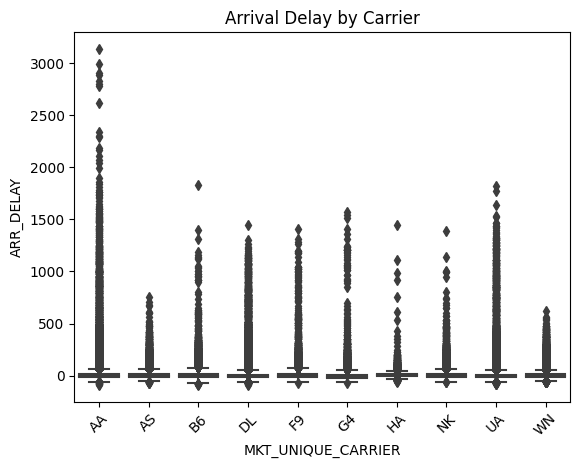

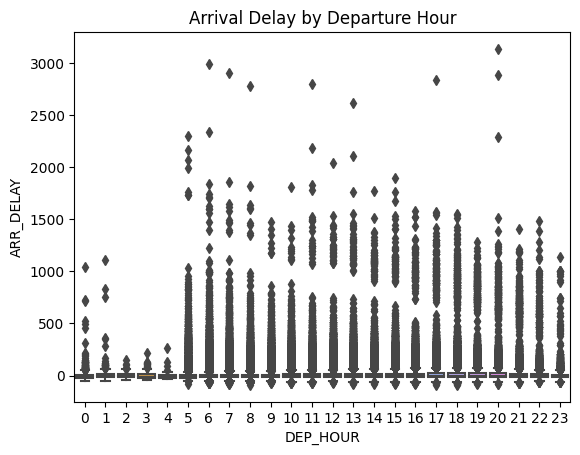

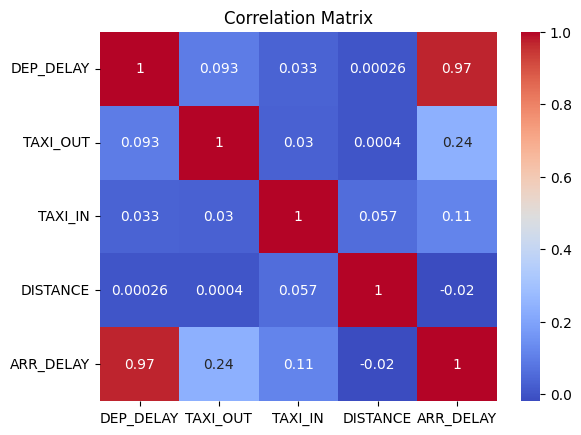

In [7]:
# Carrier vs. Delay
sns.boxplot(x='MKT_UNIQUE_CARRIER', y='ARR_DELAY', data=flights)
plt.xticks(rotation=45)
plt.title('Arrival Delay by Carrier')
plt.show()

# Departure time vs. Delay
flights['DEP_HOUR'] = flights['CRS_DEP_TIME'] // 100
sns.boxplot(x='DEP_HOUR', y='ARR_DELAY', data=flights)
plt.title('Arrival Delay by Departure Hour')
plt.show()

# Correlation matrix for numerical features
numerical_cols = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'DISTANCE', 'ARR_DELAY']
sns.heatmap(flights[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 2000x2000 with 0 Axes>

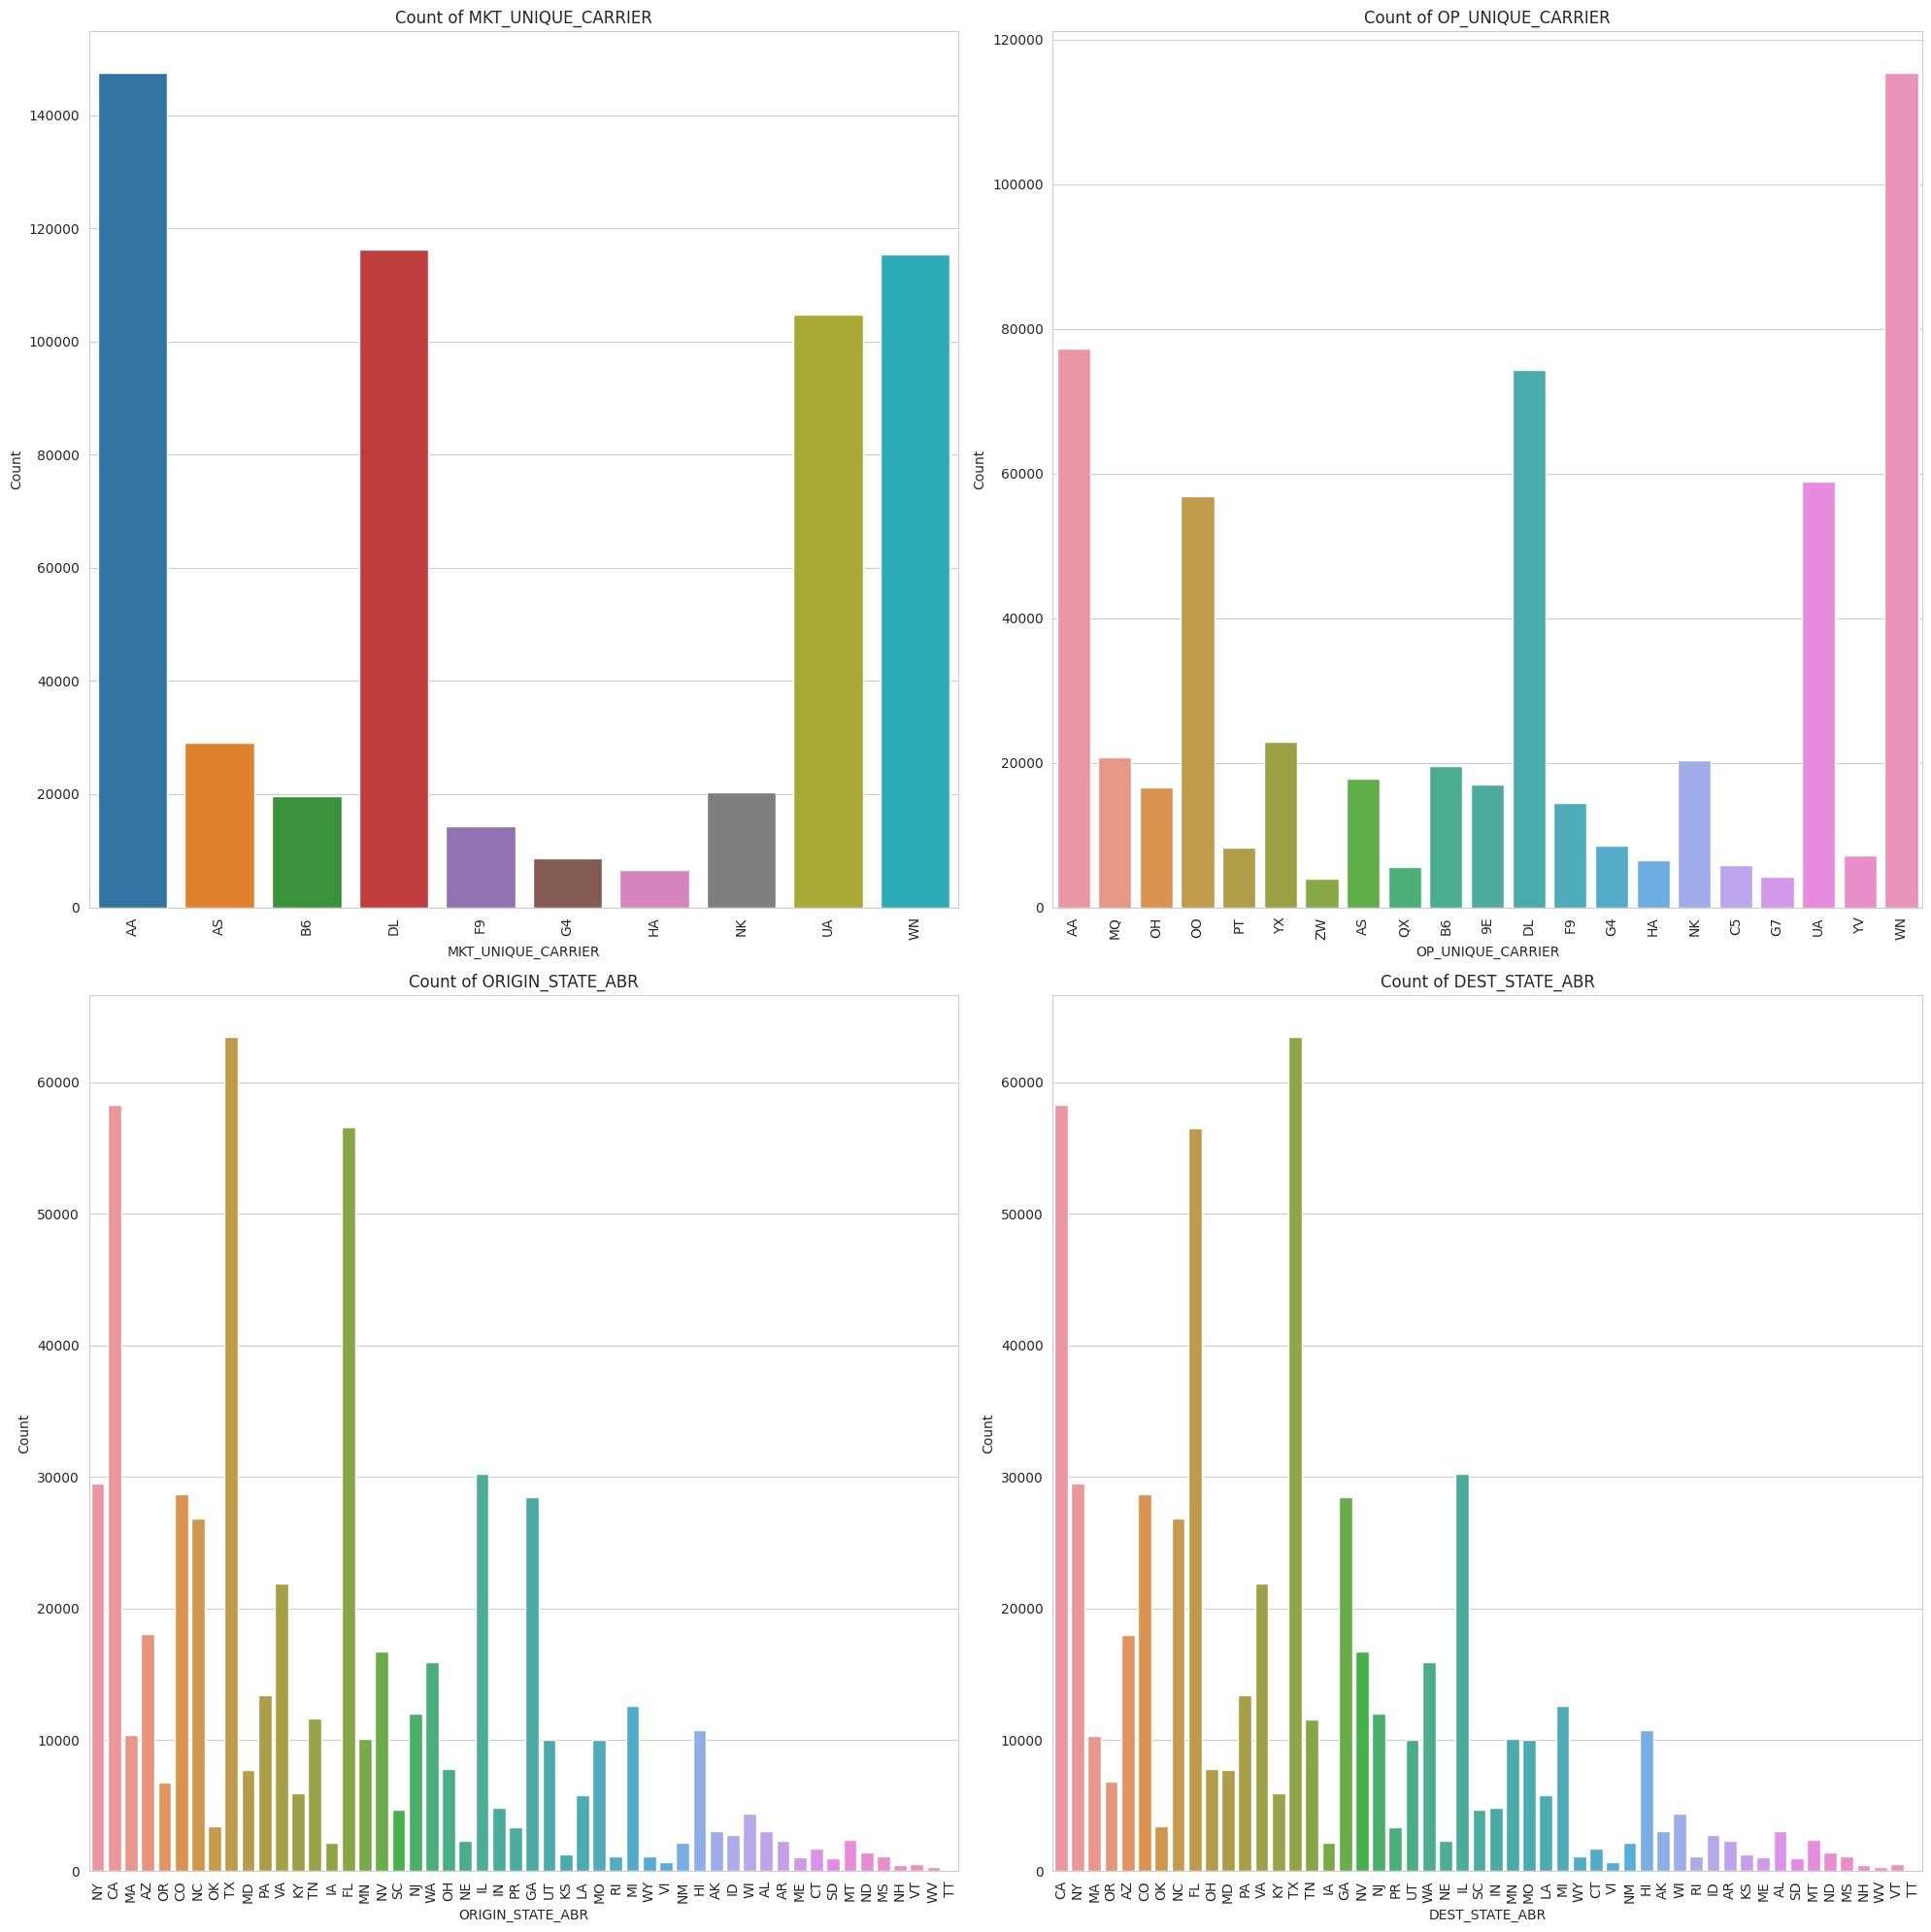

In [8]:
# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(20, 20))

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# List of columns to plot
columns = ['MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR']

# Create countplots
for i, column in enumerate(columns):
    sns.countplot(data=flights, x=column, ax=axes[i])
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
    # Rotate labels
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# merge and clean 

In [9]:
# Merge to get airline names
flights = flights.merge(iata_codes[['IATA', 'Airline']], 
                             left_on='MKT_UNIQUE_CARRIER', 
                             right_on='IATA', 
                             how='left')
print(flights['Airline'].value_counts())

Airline
American Airlines (USA) American           147443
Delta Air Lines (USA) Delta                116199
Southwest Airlines (USA) Southwest         115389
United Airlines (USA) United               104791
Alaska Airlines (USA) Alaska                29057
Spirit Airlines (USA) Spirit Wings          20415
JetBlue Airways (USA) Jetblue               19580
Frontier Airlines (USA) Frontier Flight     14379
Air Guizhou (China) Guizhou                  8596
Al egiant Air (USA) Al egiant                8596
Hawai an Airlines (USA) Hawai an             6576
Name: count, dtype: int64


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Drop columns with too many missing values
class DropHighMissingCols(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.1):
        self.threshold = threshold
        self.columns_to_keep = None

    def fit(self, X, y=None):
        missing_proportion = X.isnull().mean()
        self.columns_to_keep = missing_proportion[missing_proportion <= self.threshold].index
        print(f"Columns dropped (more than {self.threshold*100}% missing values): "
              f"{list(missing_proportion[missing_proportion > self.threshold].index)}")
        return self

    def transform(self, X):
        return X[self.columns_to_keep]

# pipeline constructor
def build_cleaning_pipeline(df):
    # Identify column types
    numeric_features = df.select_dtypes(include='number').columns.tolist()
    categorical_features = df.select_dtypes(include='object').columns.tolist()

    # Drop ARR_DELAY rows with missing target first
    df = df.dropna(subset=['ARR_DELAY'])

    # Column transformers for imputation
    preprocessor = ColumnTransformer(transformers=[
        ('num_imputer', SimpleImputer(strategy='median'), numeric_features),
        ('cat_imputer', SimpleImputer(strategy='most_frequent'), categorical_features)
    ])

    # Full pipeline
    pipeline = Pipeline(steps=[
        ('drop_high_missing', DropHighMissingCols(threshold=0.1)),
        ('impute', preprocessor)
    ])

    return pipeline, df

# Call functiom:
pipeline, flights_clean = build_cleaning_pipeline(flights)

# feature engineering

In [11]:
# Temporal features
#flights_clean['FL_DATE'] = pd.to_datetime(flights_clean['FL_DATE'])
#flights_clean['DAY_OF_WEEK'] = flights_clean['FL_DATE'].dt.dayofweek
#flights_clean['MONTH'] = flights_clean['FL_DATE'].dt.month
#flights_clean['DEP_HOUR'] = flights_clean['CRS_DEP_TIME'] // 100
#flights_clean['DEP_MINUTE'] = flights_clean['CRS_DEP_TIME'] % 100

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
flights_clean['ORIGIN_CITY_ENCODED'] = le.fit_transform(flights_clean['ORIGIN_CITY_NAME'])
flights_clean['DEST_CITY_ENCODED'] = le.fit_transform(flights_clean['DEST_CITY_NAME'])

# Onehot encode low cardinality categorical variables
flights_clean = pd.get_dummies(flights_clean, columns=['MKT_UNIQUE_CARRIER', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR'], drop_first=True)

# Create derived features
flights_clean['FLIGHT_DURATION'] = flights_clean['DISTANCE'] / 500  # Approximate duration (hours) 500mph
flights_clean['IS_DELAYED'] = (flights_clean['DEP_DELAY'] > 0).astype(int)

In [12]:
# Clip outliers in ARR_DELAY and DEP_DELAY
flights_clean['ARR_DELAY'] = flights_clean['ARR_DELAY'].clip(lower=-60, upper=300)
flights_clean['DEP_DELAY'] = flights_clean['DEP_DELAY'].clip(lower=-60, upper=300)

# split

In [14]:
flights_clean.describe()

,OP_CARRIER_FL_NUM,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_WHEELS_ON,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,DEP_HOUR,ORIGIN_CITY_ENCODED,DEST_CITY_ENCODED,FLIGHT_DURATION,IS_DELAYED
count,567081.000000,567081.000000,567081.000000,567081.000000,567081.000000,567081.000000,567081.000000,567081.000000,567081.000000,567081.000000,...,0.0,0.0,0.0,0.0,0.0,567081.000000,567081.000000,567081.000000,567081.000000,567081.000000
mean,2479.425696,31775.317046,31775.693030,1317.808124,1328.447045,13.878287,18.932325,1354.061228,1475.027167,8.256353,...,NaN,NaN,NaN,NaN,NaN,12.909653,166.094572,166.144316,1.616951,0.396053
std,1675.855091,1337.279740,1337.398829,480.976284,495.346325,44.706548,11.508561,496.201725,519.123434,6.929154,...,NaN,NaN,NaN,NaN,NaN,4.783968,96.944967,96.932191,1.165672,0.489076
min,1.000000,30070.000000,30070.000000,6.000000,1.000000,-56.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.062000,0.000000
25%,1133.000000,30693.000000,30693.000000,910.000000,918.000000,-6.000000,12.000000,936.000000,1101.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,9.000000,78.000000,78.000000,0.772000,0.000000
50%,2151.000000,31454.000000,31454.000000,1315.000000,1325.000000,-2.000000,16.000000,1340.000000,1509.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,13.000000,178.000000,178.000000,1.332000,0.000000
75%,3667.000000,32575.000000,32575.000000,1721.000000,1735.000000,12.000000,22.000000,1750.000000,1911.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,17.000000,244.000000,244.000000,2.100000,1.000000
max,9685.000000,36101.000000,36101.000000,2359.000000,2400.000000,300.000000,213.000000,2400.000000,2400.000000,444.000000,...,NaN,NaN,NaN,NaN,NaN,23.000000,344.000000,344.000000,10.190000,1.000000


In [15]:
features = [
    'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'DISTANCE', 'FLIGHT_DURATION',
    'DEP_HOUR', 'ORIGIN_CITY_ENCODED', 'DEST_CITY_ENCODED'] + [col for col in flights.columns if col.startswith('MKT_UNIQUE_CARRIER_') or 
     col.startswith('ORIGIN_STATE_ABR_') or col.startswith('DEST_STATE_ABR_')]
X = flights_clean[features]
y = flights_clean['ARR_DELAY']

In [16]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# baseline model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('Linear Regression R2:', r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 11.097995353921911
Linear Regression R2: 0.9473855043257577


Random Forest RMSE: 10.95237920881041
Random Forest R2: 0.9487571496756011


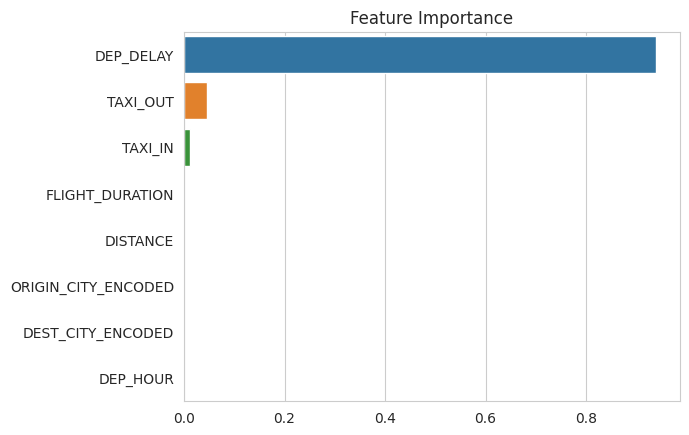

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('Random Forest R2:', r2_score(y_test, y_pred_rf))

# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()